# 2. 多臂老虎机

## 2.1 简介
我们在第 1 章中了解到，强化学习关注智能体和环境交互过程中的学习，这是一种试错型学习（trial-and-error learning）范式。在正式学习强化学习之前，我们需要先了解多臂老虎机问题，它可以被看作简化版的强化学习问题。与强化学习不同，多臂老虎机不存在状态信息，只有动作和奖励，算是最简单的“和环境交互中的学习”的一种形式。多臂老虎机中的探索与利用（exploration vs. exploitation）问题一直以来都是一个特别经典的问题，理解它能够帮助我们学习强化学习。

## 2.2 问题介绍
### 2.2.1 问题定义
在多臂老虎机（multi-armed bandit，MAB）问题中，有一个拥有 $K$ 根拉杆的老虎机，拉动每一根拉杆都对应一个关于奖励的概率分布 $\mathcal{R}$。我们每次拉动其中一根拉杆，就可以从该拉杆对应的奖励概率分布中获得一个奖励 $r$。我们在各根拉杆的奖励概率分布未知的情况下，从头开始尝试，目标是在操作 $T$ 次拉杆后获得尽可能高的累积奖励。由于奖励的概率分布是未知的，因此我们需要在“探索拉杆的获奖概率”和“根据经验选择获奖最多的拉杆”中进行权衡。“采用怎样的操作策略才能使获得的累积奖励最高”便是多臂老虎机问题。如果是你，会怎么做呢？

### 2.2.2 形式化描述

多臂老虎机可以形式化表达为：一个元组 $<\mathcal{A},\mathcal{R}>$，其中

- $\mathcal{A}$  为动作集合，其中一个动作表示拉动一个拉杆。若多臂老虎机一共有 $K$ 根拉杆，那动作空间就是集合 $\{ a_1, …,a_K\}$，我们用 $a_t \in \mathcal{A}$  表示任意一个动作
- $\mathcal{R}$ 为奖励概率分布，拉动每一根拉杆的动作a 都对应一个奖励概率分布 $\mathcal{R}(r|a)$，不同拉杆的奖励分布通常是不同的
    
假设每个时间步只能拉动一个拉杆，多臂老虎机的目标为最大化一段时间步 T 内累积的奖励：$\max\sum_{t = 1}^{T}r_t, r_t \sim \mathcal{R}(\cdot | a_t)$，其中 $a_t$ 表示第 $t$ 时间步拉动某一拉杆的动作，$r_t$ 表示动作 $a_t$ 获得的奖励
    
### 2.2.3 累积懊悔（cumulative regret）

- 对于每一个动作 $a$，我们定义其期望奖励为 $Q(a) = \mathbb{E}_{r_t \sim \mathcal{R}(\cdot | a_t)}[r]$，于是，至少存在一根拉杆，它的期望奖励不小于拉动其他任意一根拉杆，我们将最优期望奖励表示为 $Q^* = \max_{a \in \mathcal{A}}Q(a)$。为了更加直观、方便地观察拉动一根拉杆的期望奖励离最优拉杆期望奖励的差距，即 $R(a) = Q^* - Q(a)$。累积懊悔即操作 T 次拉杆后累积的懊悔总量，对于一次完整的 T 步决策 $\{a_1, a_2, …, a_T\}$，累积懊悔为  $\sigma_R = \sum_{t = 1}^T R(a_t)$。MAB 问题的目标为最大累积奖励，等价于最小化累计懊悔

### 2.2.4 估计期望奖励

- 为了知道拉动哪一根拉杆能获得更高的奖励，我们需要估计拉动这根拉杆的期望奖励。由于只拉动一次拉杆获得的奖励存在随机性，所以需要多次拉动一根拉杆，然后计算得到多次奖励的期望，其算法流程如下：
    - 对于 $\forall{a} \in \mathcal{A}$，初始化计数器 $N(a) = 0$ 和 期望奖励估值  $\hat{Q}(a) = 0$
    - $for \: t = 1 \to T \:do$
        - 选取某根拉杆，该动作记为 $a_t$
        - 得到奖励 $r_t$
        - 更新计数器：$N(a_t) += 1$
        - 更新期望奖励估值：$\hat{Q}(a_t) =  \hat{Q}(a_t) + \frac{1}{N(a_t)}[r_t - \hat{Q}(a_t)]$
    - $end \: for$
- 相较于将所有数求和再除以次数，时间复杂度和空间复杂度均为 $O(n)$，可以进行增量式的期望更新，时间复杂度和空间复杂度均为 $O(1)$ ，原因如下：
$$
\begin{align*}
Q_k &= \frac{1}{k}\sum_{i=1}^{k}r_i \\  &= \frac{1}{k}(r_k + \sum_{i=1}^{k-1}r_i) \\
    &= \frac{1}{k}(r_k + (k-1)Q_{k-1}) \\
    &= \frac{1}{k}(r_k + kQ_{k-1} - Q_{k-1})  \\
    &= Q_{k-1} + \frac{1}{k}[r_k - Q_{k-1}]
\end{align*}
$$

- 我们编写代码来实现一个拉杆数为 10 的多臂老虎机。其中拉动每根拉杆的奖励服从伯努利分布（Bernoulli distribution），即每次拉下拉杆有的概率获得的奖励为 1，有的概率获得的奖励为 0。奖励为 1 代表获奖，奖励为 0 代表没有获奖

In [21]:
import numpy as np
import matplotlib.pyplot as plt

class BernouliBandit:
    """伯努利多臂老虎机，输入K表示拉杆个数"""
    def __init__(self, K):
        self.probs = np.random.uniform(size = K)  # 随机生成 K 个 0~1 的数作为拉动每根拉杆的获奖
        # 概率
        self.best_idx = np.argmax(self.probs)  # 获奖概率最大的拉杆的索引
        self.best_prob = self.probs[self.best_idx]  # 获奖概率最大的拉杆的概率
        self.K = K  # 拉杆个数

    def step(self, k):
        """拉动拉杆，返回是否获奖，k为拉动的拉杆索引，获奖返回1，否则返回0"""
        if np.random.rand() < self.probs[k]:
            return 1
        else:
            return 0
     

class Solver:
    """多臂老虎机算法基本框架"""
    def __init__(self, bandit):
        self.bandit = bandit
        self.counts = np.zeros(self.bandit.K)  ## 每个拉杆被拉动的次数
        self.regret = 0  # 当前步的累积懊悔
        self.actions = []  # 维护一个列表，记录每一步动作
        self.regrets = []  # 维护一个列表，记录每一步的累积懊悔

    def update_regret(self, k):
        # 计算累积懊悔并保存，k为当前拉动的拉杆索引
        self.regret += self.bandit.best_prob - self.bandit.probs[k]
        self.regrets.append(self.regret)

    def run_one_step(self):
        # 返回当前动作选择哪一根拉杆，由每个具体的策略实现
        raise NotImplementedError

    def run(self, num_steps):
        # 运行一定次数，num_steps为总运行次数
        for _ in range(num_steps):
            k = self.run_one_step()
            self.counts[k] += 1
            self.actions.append(k)
            self.update_regret(k)


np.random.seed(1)  # 设置随机种子，使得实验具有可重复性
K = 10
bandit_10_arm = BernouliBandit(K)
print(f"随机生成了一个{K}臂伯努利老虎机，其中最优拉杆的索引为{bandit_10_arm.best_idx}，概率为{bandit_10_arm.best_prob}")

随机生成了一个10臂伯努利老虎机，其中最优拉杆的索引为1，概率为0.7203244934421581


## 2.3 探索与利用的平衡

- 在上述算法框架中，还没有一个策略告诉我们应该采取哪个动作，即拉动哪根拉杆，所以接下来我们将学习如何设计一个策略，例如：一个最简单的策略就是一直采取第一个动作，但是这个非常依赖运气的好坏。在多臂老虎机问题中，一个经典的问题就是探索和利用的平衡问题。探索是指尝试拉动更多可能的拉杆，这根拉杆不一定会获得最大的奖励，但这种方案能够摸清楚所有拉杆的获奖情况。例如，对于一个 10 臂老虎机，我们要把所有的拉杆都拉动一下，才知道哪根拉杆可能获得最大的奖励。利用是指拉动一直期望奖励最大的那根拉杆，由于已知的信息仅仅来自有限次的交互观测，所以当前的最优拉杆不一定是全局最优的。例如，对于一个 10 臂老虎机，我们只拉动过其中 3 根拉杆，接下来就一直拉动这 3 根拉杆中期望奖励最大的那根拉杆，但很有可能期望奖励最大的拉杆在剩下的 7 根当中，即使我们对 10 根拉杆各自尝试了 20 次，发现 5 号拉杆的经验期望奖励是最高的，但仍然存在微小的概率 —— 另一根 6 号拉杆的真实期望奖励是比 5 号拉杆更高
- 于是在多臂老虎机问题中，设计策略时就需要平衡探索和利用的次数，使得累积奖励最大化。一个比较常用的思路是在开始时做比较多的探索，在对每根拉杆都有比较准确的估计后，再进行利用，目前已有一些比较经典的算法来解决这个问题，例如：$\varepsilon$ - 贪婪算法、上置信界算法和汤普森采样算法等

## 2.4 $\varepsilon$ - 贪婪算法
- 完全贪婪算法即在每一时刻采取期望奖励估值最大的动作（拉动拉杆），这就是纯粹的利用，而没有探索，所以我们通常需要对完全贪婪算法进行一些修改，其中比较经典的一种方法为 $\varepsilon$ - 贪婪算法，$\varepsilon$ - 贪婪（$\varepsilon$ - Greedy）算法在完全贪婪算法的基础上添加了噪声，每次以概率 1 - $\varepsilon$ 选择以往经验中期望奖励估值最大的那根拉杆（利用），以概率 $\varepsilon$ 随机选择一根拉杆（探索），公式如下：

$$
a_t = \begin{cases} \arg\max_{a\in\mathcal{A}}\hat{Q}(a) & 采样概率：1-\varepsilon \\
从 \mathcal{A} 中随机选择 & 采样概率：\varepsilon
\end{cases}
$$
- 随着探索次数的不断增加，我们对各个动作的奖励估计得越来越准，此时我们就没必要继续花大力气进行探索。所以在 $\varepsilon$ - 贪婪算法的具体实现中，我们可以令 $\varepsilon$ 随时间衰减，即探索的概率将会不断降低。但是请注意，$\varepsilon$ 不会在有限的步数内衰减至 0 ， 因为基于有限步数观测的完全贪婪算法仍然是一个局部信息的贪婪算法，永远距离最优解有一个固定的差距
- 朴素的 $\varepsilon$ - 贪婪算法（$\varepsilon$ 不随时间的变化而变化，无论 $\varepsilon$ 取值为多少，累积懊悔都是线性增长的，随着 $\varepsilon$ 的增大，累积懊悔增长的速率也会增大）
- 编写代码实现一个  $\varepsilon$ - 贪婪算法，解决 10 臂老虎机的问题，设置 $\varepsilon = 0.01$，以及 $T = 5000$

ε-greedy 算法的累积懊悔为25.526630933945313


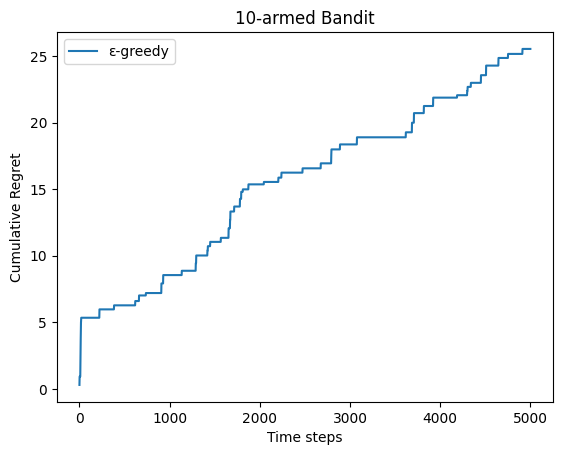

In [22]:
class EpsilonGreedy(Solver):
    """ ε-greedy 算法，继承自 Solver """
    def __init__(self, bandit, epsilon = 0.01, init_prob = 1.0):
        super(EpsilonGreedy, self).__init__(bandit)
        self.epsilon = epsilon
        # 初始化拉动所有拉杆的期望奖励估值
        self.estimates = init_prob * np.ones(self.bandit.K)

    def run_one_step(self):
        if np.random.rand() < self.epsilon:
            k = np.random.choice(self.bandit.K)  # 随机选择一根拉杆
        else:
            k = np.argmax(self.estimates)  # 选择期望奖励估值最大的拉杆
        reward = self.bandit.step(k)  # 拉动拉杆，获取奖励
        self.estimates[k] += 1.0 / (self.counts[k] + 1) * (reward - self.estimates[k])  # 更新期望奖励估值
        return k


def plot_results(solvers, solver_names):
    """ 生成累计懊悔随时间变化的图。输入 solvers 是一个列表，列表中的每个元素是一种特定的策略，solver_names 也是一个列表，存储每个策略的名称 """
    for idx, solver in enumerate(solvers):
        time_list = range(len(solver.regrets))  # 时间步
        plt.plot(time_list, solver.regrets, label = solver_names[idx])

    plt.xlabel("Time steps")
    plt.ylabel("Cumulative Regret")
    plt.title(f"{solver.bandit.K}-armed Bandit")
    plt.legend()
    plt.show()


np.random.seed(1)
epsilon_greedy_solver = EpsilonGreedy(bandit_10_arm, epsilon = 0.01)
epsilon_greedy_solver.run(5000)
print(f"ε-greedy 算法的累积懊悔为{epsilon_greedy_solver.regret}")
plot_results([epsilon_greedy_solver], ["ε-greedy"])

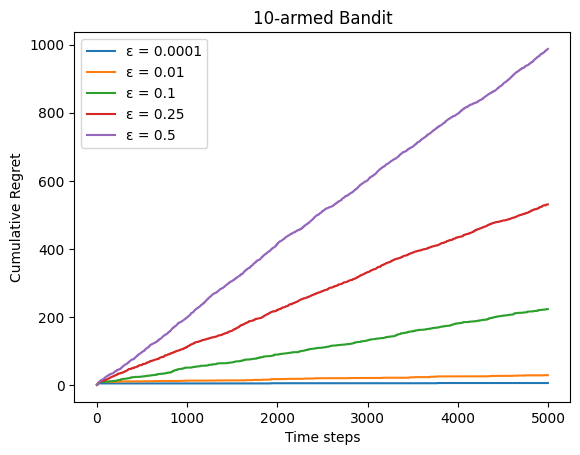

In [24]:
np.random.seed(0)
epsilons = [1e-4, 0.01, 0.1, 0.25, 0.5]
epsilon_greedy_solver_list = [
    EpsilonGreedy(bandit_10_arm, epsilon = eps) for eps in epsilons
]
epsilon_greedy_solver_names = [f"ε = {eps}" for eps in epsilons]
for solver in epsilon_greedy_solver_list:
    solver.run(5000)

plot_results(epsilon_greedy_solver_list, epsilon_greedy_solver_names)

- $\varepsilon$ 随时间衰减的 $\varepsilon$ - 贪婪算法，采用的具体衰减形式为反比例衰减 $\epsilon_t=\frac{1}{t}$（随时间做反比例衰减的 $\varepsilon$ - 贪婪算法能够使累积懊悔与时间步的关系呈次线性，这明显优于固定 $\varepsilon$ 值的 $\varepsilon$ - 贪婪算法）

Decaying ε-greedy 算法的累积懊悔为10.114334931260183


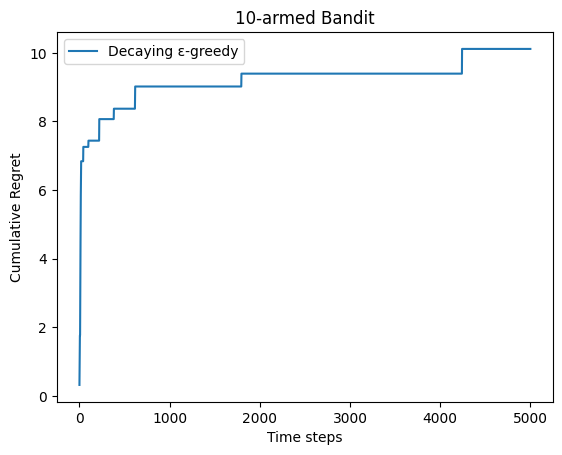

In [10]:
class DecayingEpsionGreedy(Solver):
    """ epsilon值随时间变化的ε-greedy算法，继承Solver类 """
    def __init__(self, bandit, init_prob = 1.0):
        super(DecayingEpsionGreedy, self).__init__(bandit)
        self.estimates = np.array([init_prob] * self.bandit.K)
        self.total_count = 0

    def run_one_step(self):
        self.total_count += 1
        if np.random.random() < 1 / self.total_count:
            k = np.random.randint(self.bandit.K)
        else:
            k = np.argmax(self.estimates)
        
        reward = self.bandit.step(k)
        self.estimates[k] += 1.0 / (self.counts[k] + 1) * (reward - self.estimates[k])

        return k


np.random.seed(1)
decaying_epsilon_greedy_solver = DecayingEpsionGreedy(bandit_10_arm)
decaying_epsilon_greedy_solver.run(5000)
print(f"Decaying ε-greedy 算法的累积懊悔为{decaying_epsilon_greedy_solver.regret}")
plot_results([decaying_epsilon_greedy_solver], ["Decaying ε-greedy"])

## 2.5 上置信界算法
- 设想这样一种情况：对于一台双臂老虎机，其中第一根拉杆只被拉动过一次，得到的奖励为 $0$；第二根拉杆被拉动过很多次，我们对它的奖励分布已经有了大致的把握。这时你会怎么做？或许你会进一步尝试拉动第一根拉杆，从而更加确定其奖励分布。这种思路主要是基于不确定性，因为此时第一根拉杆只被拉动过一次，它的不确定性很高。一根拉杆的不确定性越大，它就越具有探索的价值，因为探索之后我们可能发现它的期望奖励很大。我们在此引入不确定性度量 $U(a)$，它会随着一个动作被尝试次数的增加而减小。我们可以使用一种基于不确定性的策略来综合考虑现有的期望奖励估值和不确定性，其核心问题是如何估计不确定性。
- 上置信界(UCB)算法是一种经典的基于不确定性的策略算法，其思想用到了一个非常著名的数学原理：霍夫丁不等式。在霍夫丁不等式中，令 $X_1, ...,X_n$ 为 $n$ 个独立同分布的随机变量，取值范围为$[0,1]$，其经验期望为：$\bar{x}_n = \frac{1}{n}\sum_{j=1}^nX_j$，则有：
$$
\mathbb{P}\{\mathbb{E}[X] \geq \bar{x}_n + u\} \leq e^{-2nu^2}
$$
- 现在我们将霍夫丁不等式运用于多臂老虎机问题中，将 $\hat{Q}_t(a)$ 代入 $\bar{x}_t$，不等式中的参数 $u = \hat{U}_t(a)$ 代表不确定性度量。给定一个概率 $p = e^{-2N_t(a)U_t(a)^2}$，根据上述不等式，$Q_t(a) < \hat{Q}_t(a) + \hat{U}_t(a)$ 至少以概率 $1-p$ 成立。当 $p$ 很小时，$Q_t(a) < \hat{Q}_t(a) + \hat{U}_t(a)$ 以很大概率成立，$\hat{Q}_t(a) + \hat{U}_t(a)$ 便是期望奖励上界。此时，上置信界算法便选取期望奖励上界最大的动作，即 $a = \arg\max_{a \in \mathcal{A}}[\hat{Q}(a) + \hat{U}(a)]$。那其中 $\hat{U}_t(a)$ 具体是什么呢？根据等式 $e^{-2N_t(a)U_t(a)^2}$，解之即得 $\hat{U}_t(a) = \sqrt{\frac{-\log{p}}{2N_t(a)}}$。因此，设定一个概率 $p$ 后，就可以计算相应的不确定性度量 $\hat{U}_t(a)$ 了。更直观地说，UCB 算法在每次选择拉杆前，先估计每根拉杆的期望奖励的上界，是的拉动每根拉杆的期望奖励只有一个较小的概率 $p$ 超过这个上界，接着选出期望奖励上界最大的拉杆，从而选择最有可能获得最大期望奖励的拉杆
- 编写代码来实现 UCB 算法，并且仍然使用前面定义的 10 臂老虎机来观察实验结果。在具体的实现过程中，设置 $p = \frac{1}{t}$，并且在分母中为拉动每根拉杆的次数加上常数 1，以免出现分母为 0 的情形，即此时 $\hat{U}_t(a) = \sqrt{\frac{-\log{p}}{2N_t(a) + 1}}$。同时，我们设定一个系数 $c$ 来控制不确定性的比重，此时 $a = \arg\max_{a \in \mathcal{A}}\hat{Q}(a) + c \cdot \hat{U}(a)$

UCB算法的累积懊悔为70.45281214197854


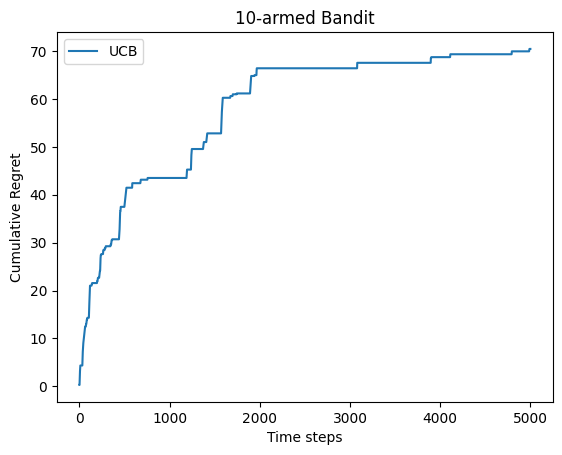

In [9]:
class UCB(Solver):
    """ UCB算法，继承Solver类 """
    def __init__(self, bandit, coef, init_prob = 1.0):
        super(UCB, self).__init__(bandit)
        self.total_count = 0
        self.estimates = np.array([init_prob] * self.bandit.K)
        self.coef = coef

    def run_one_step(self):
        self.total_count += 1
        ucb = self.estimates + self.coef * np.sqrt(
            np.log(self.total_count) / (2 * (self.counts + 1)))  # 计算上置信界
        k = np.argmax(ucb)  # 选择上置信界最大的拉杆
        reward = self.bandit.step(k)  # 拉动拉杆，获取奖励
        self.estimates[k] += 1.0 / (self.counts[k] + 1) * (reward - self.estimates[k])  # 更新当前拉杆的期望奖励估值
        return k


np.random.seed(1)
coef = 1.0  # 控制不确定性比重的系数
UCB_solver = UCB(bandit_10_arm, coef)
UCB_solver.run(5000)
print(f"UCB算法的累积懊悔为{UCB_solver.regret}")
plot_results([UCB_solver], ["UCB"])

## 2.6 汤普森采样算法
- MAB 中还有一种经典算法——汤普森采样（Thompson sampling），先假设拉动每根拉杆的奖励服从一个特定的概率分布，然后根据拉动每根拉杆的期望奖励来进行选择。但是由于计算所有拉杆的期望奖励的代价比较高，汤普森采样算法使用采样的方式，即根据当前每个动作 $a$ 的奖励概率分布进行一轮采样，得到一组各根拉杆的奖励样本，再选择样本中奖励最大的动作。可以看出，汤普森采样是一种计算所有拉杆的最高奖励概率的蒙特卡洛采样方法
- 了解汤普森采样算法的基本思路后，我们需要解决另外一个问题：怎样得到当前每个动作 $a$ 的奖励概率分布并且在过程中进行更新？在实际情况中，我们通常用 Beta 分布对当前每个动作的奖励概率分布进行建模。具体来说，若某拉杆被选择了 $k$ 次，其中 $m_1$ 次奖励为 1，$m_0$ 次奖励为 0，则该拉杆的奖励服从参数为 $(m_1 + 1, m_2 + 1)$ 的 Beta 分布。
- 编写代码实现汤普森采样算法，并且依然使用之前定义的 10 臂老虎机来观察结果

Thompson Sampling算法的累积懊悔为57.19161964443925


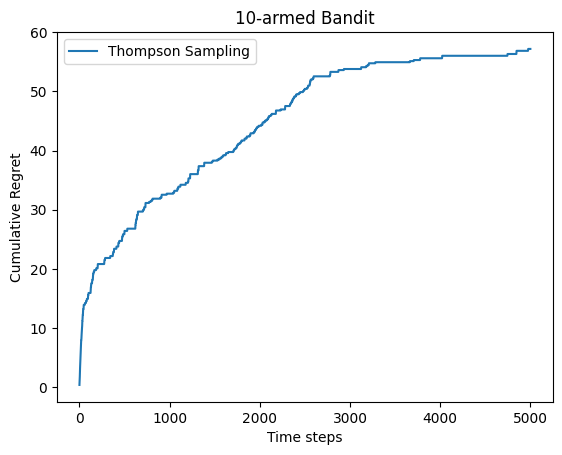

In [8]:
class ThompsonSampling(Solver):
    """ 汤普森采样算法，继承Solver类 """
    def __init__(self, bandit):
        super(ThompsonSampling, self).__init__(bandit)
        self._a = np.ones(self.bandit.K)  # 列表，表示每根拉杆奖励为 1 的次数
        self._b = np.ones(self.bandit.K)  # 列表，表示每根拉杆奖励为 0 的次数

    def run_one_step(self):
        samples = np.random.beta(self._a, self._b)  # 按照 Beta 分布采样一组奖励样本
        k = np.argmax(samples)  # 选择采样奖励最大的拉杆
        reward = self.bandit.step(k)

        self._a[k] += reward  # 更新 Beta 分布的第一个参数
        self._b[k] += 1 - reward  # 更新 Beta 分布的第二个参数
        return k


np.random.seed(1)
thompson_sampling_solver = ThompsonSampling(bandit_10_arm)
thompson_sampling_solver.run(5000)
print(f"Thompson Sampling算法的累积懊悔为{thompson_sampling_solver.regret}")
plot_results([thompson_sampling_solver], ["Thompson Sampling"])

## 2.7 总结
- 探索与利用是与环境做交互学习的重要问题，是强化学习试错法中的必备技术，而多臂老虎机的问题是研究探索和利用技术理论的最佳环境。了解多臂老虎机的探索和利用问题，对接下来我们学习强化学习探索很有重要的帮助。$\varepsilon$ -贪婪算法、上置信界算法和汤普森采样算法在多臂老虎机问题中十分常用，其中上置信界算法和汤普森采样方法均能保证对数的渐进最优累积懊悔 
- 通过实验我们可以得到以下结论： $\varepsilon$-贪婪算法的累积懊悔是随时间线性增长的，而另外 3 种算法（$\varepsilon$ -衰减贪婪算法、上置信界算法、汤普森采样算法）的累积懊悔都是随时间次线性增长的（具体为对数形式增长）